# A General Recognition Theory Model for Identifying an Ideal Stimulus
Inglis, Bird & Ashby

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import itertools
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import PIL
from scipy.stats import multivariate_normal


In [2]:
flist = !cat GRT-Ideal-data/filename.txt 
# flist

In [3]:
plist = !cat planets/planetname.txt
# plist

## Create dataframe of liking data

In [4]:
pids = 0
report = [1,3]

prefdf = pd.DataFrame()
for f in flist:
    for r in report:
        tmpdf = pd.read_excel('GRT-Ideal-data/%s' % f, sheet_name=r)
        tmpdfcut = tmpdf.loc[tmpdf.index[0:20], ['imageFile', 'rating_2.response_raw']]
        tmpdfcut['participant'] = pids
        prefdf = pd.concat([prefdf,tmpdfcut])
        pids += 1

prefdf_1 = prefdf.set_index(['imageFile', 'participant']).rename(columns={"rating_2.response_raw": "rating", "imageFile": "planet"})
# prefdf_new = prefdf_1.rename(columns={"rating_2.response_raw": "rating", "imageFile": "planet"})

subject_data_liking = prefdf_1.unstack(['participant'])
subject_data_liking

rating                                               ...  \
participant             0    1    2    3    4    5    6    7    8    9   ...   
imageFile                                                                ...   
images/scr00000.jpg    3.0  3.0  4.0  5.0  3.0  3.0  4.0  2.0  6.0  4.0  ...   
images/scr00001.jpg    3.0  4.0  5.0  7.0  6.0  7.0  6.0  5.0  5.0  4.0  ...   
images/scr00002.jpg    1.0  1.0  3.0  3.0  7.0  7.0  6.0  4.0  6.0  4.0  ...   
images/scr00003.jpg    7.0  7.0  7.0  7.0  7.0  7.0  2.0  1.0  5.0  4.0  ...   
images/scr00004.jpg    7.0  6.0  3.0  1.0  7.0  7.0  4.0  1.0  5.0  4.0  ...   
images/scr00005.jpg    7.0  7.0  6.0  6.0  7.0  7.0  7.0  7.0  5.0  4.0  ...   
images/scr00006.jpg    4.0  5.0  6.0  6.0  4.0  4.0  5.0  7.0  7.0  4.0  ...   
images/scr00007.jpg    2.0  1.0  2.0  7.0  2.0  5.0  6.0  7.0  6.0  4.0  ...   
images/scr00008.jpg    1.0  1.0  1.0  1.0  6.0  5.0  3.0  1.0  5.0  4.0  ...   
images/scr00009.jpg    2.0  1.0  5.0  1.0  7.0  7.0  5.0  6.0  5.0  4.0  ...   
images/scr00010.jpg    7.0  6.0  7.0  4.0  6.0  6.0  4.0  5.0  5.0  4.0  ...   
images/scr00011.jpg    3.0  3.0  7.0  5.0  7.0  7.0  4.0  4.0  5.0  4.0  ...   
images/scr00012.jpg    2.0  4.0  6.0  5.0  3.0  3.0  6.0  7.0  5.0  4.0  ...   
images/scr00013.jpg    3.0  3.0  6.0  7.0  6.0  5.0  7.0  7.0  5.0  4.0  ...   
images/scr00014.jpg    3.0  4.0  7.0  7.0  3.0  3.0  7.0  7.0  6.0  4.0  ...   
images/scr00015.jpg    7.0  7.0  6.0  7.0  7.0  7.0  7.0  7.0  6.0  4.0  ...   
images/scr00016.jpg    6.0  6.0  6.0  7.0  5.0  5.0  5.0  7.0  5.0  4.0  ...   
images/scr00017.jpg    6.0  5.0  7.0  6.0  7.0  7.0  6.0  4.0  6.0  4.0  ...   
images/scr00018.jpg    1.0  1.0  4.0  2.0  6.0  7.0  5.0  4.0  6.0  4.0  ...   
images/scr00019.jpg    4.0  6.0  6.0  6.0  3.0  3.0  6.0  7.0  5.0  4.0  ...   

                                                                       
participant           48   49   50   51   52   53   54   55   56   57  
imageFile                                                              
images/scr00000.jpg  3.0  2.0  2.0  3.0  3.0  2.0  7.0  5.0  3.0  4.0  
images/scr00001.jpg  3.0  2.0  3.0  5.0  4.0  2.0  4.0  3.0  4.0  5.0  
images/scr00002.jpg  4.0  4.0  1.0  2.0  3.0  1.0  6.0  2.0  4.0  3.0  
images/scr00003.jpg  5.0  7.0  4.0  6.0  5.0  6.0  4.0  7.0  7.0  7.0  
images/scr00004.jpg  5.0  7.0  7.0  6.0  5.0  6.0  4.0  6.0  5.0  7.0  
images/scr00005.jpg  5.0  7.0  6.0  7.0  6.0  6.0  5.0  7.0  6.0  7.0  
images/scr00006.jpg  1.0  1.0  2.0  5.0  2.0  2.0  7.0  7.0  3.0  1.0  
images/scr00007.jpg  4.0  2.0  4.0  5.0  3.0  1.0  5.0  6.0  5.0  1.0  
images/scr00008.jpg  5.0  5.0  2.0  1.0  4.0  1.0  2.0  4.0  3.0  1.0  
images/scr00009.jpg  5.0  5.0  1.0  1.0  3.0  1.0  7.0  6.0  3.0  1.0  
images/scr00010.jpg  6.0  7.0  7.0  7.0  6.0  7.0  7.0  5.0  6.0  7.0  
images/scr00011.jpg  4.0  3.0  5.0  6.0  3.0  3.0  1.0  2.0  4.0  2.0  
images/scr00012.jpg  3.0  2.0  3.0  5.0  4.0  2.0  4.0  2.0  5.0  4.0  
images/scr00013.jpg  3.0  3.0  3.0  6.0  4.0  4.0  5.0  4.0  4.0  3.0  
images/scr00014.jpg  3.0  2.0  3.0  4.0  3.0  2.0  5.0  4.0  4.0  5.0  
images/scr00015.jpg  6.0  7.0  6.0  7.0  6.0  6.0  7.0  7.0  6.0  7.0  
images/scr00016.jpg  5.0  4.0  7.0  7.0  7.0  6.0  6.0  6.0  6.0  6.0  
images/scr00017.jpg  5.0  3.0  6.0  7.0  6.0  5.0  7.0  7.0  6.0  5.0  
images/scr00018.jpg  5.0  5.0  1.0  1.0  3.0  2.0  2.0  4.0  3.0  1.0  
images/scr00019.jpg  4.0  4.0  5.0  7.0  3.0  1.0  7.0  7.0  5.0  4.0  

[20 rows x 58 columns]

## Any importance phase in which the participant emitted 3 or fewer unique ratings was excluded from analysis


In [5]:
drop_values = list(np.where(prefdf_1.groupby('participant').agg({"rating": "nunique"})['rating'] < 4)[0])
drop_values

[8, 9, 13, 38, 39, 42]

In [6]:
subject_data_liking = subject_data_liking['rating'].drop(drop_values,axis=1)
subject_data_liking

participant,0,1,2,3,4,5,6,7,10,11,...,48,49,50,51,52,53,54,55,56,57
imageFile,,,,,,,,,,,,,,,,,,,,,
images/scr00000.jpg,3.0,3.0,4.0,5.0,3.0,3.0,4.0,2.0,5.0,3.0,...,3.0,2.0,2.0,3.0,3.0,2.0,7.0,5.0,3.0,4.0
images/scr00001.jpg,3.0,4.0,5.0,7.0,6.0,7.0,6.0,5.0,5.0,5.0,...,3.0,2.0,3.0,5.0,4.0,2.0,4.0,3.0,4.0,5.0
images/scr00002.jpg,1.0,1.0,3.0,3.0,7.0,7.0,6.0,4.0,5.0,3.0,...,4.0,4.0,1.0,2.0,3.0,1.0,6.0,2.0,4.0,3.0
images/scr00003.jpg,7.0,7.0,7.0,7.0,7.0,7.0,2.0,1.0,7.0,7.0,...,5.0,7.0,4.0,6.0,5.0,6.0,4.0,7.0,7.0,7.0
images/scr00004.jpg,7.0,6.0,3.0,1.0,7.0,7.0,4.0,1.0,7.0,7.0,...,5.0,7.0,7.0,6.0,5.0,6.0,4.0,6.0,5.0,7.0
images/scr00005.jpg,7.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,6.0,7.0,...,5.0,7.0,6.0,7.0,6.0,6.0,5.0,7.0,6.0,7.0
images/scr00006.jpg,4.0,5.0,6.0,6.0,4.0,4.0,5.0,7.0,6.0,6.0,...,1.0,1.0,2.0,5.0,2.0,2.0,7.0,7.0,3.0,1.0
images/scr00007.jpg,2.0,1.0,2.0,7.0,2.0,5.0,6.0,7.0,5.0,3.0,...,4.0,2.0,4.0,5.0,3.0,1.0,5.0,6.0,5.0,1.0
images/scr00008.jpg,1.0,1.0,1.0,1.0,6.0,5.0,3.0,1.0,3.0,4.0,...,5.0,5.0,2.0,1.0,4.0,1.0,2.0,4.0,3.0,1.0


## Aggregate the participant liking data 

In [7]:
sample_data_liking = np.zeros((20,7))
for j, i in enumerate(plist):
    for k in range(7): 
        count_p = subject_data_liking.loc['images/%s' % i].transform(lambda x : len(np.where(x==k+1)[0]))
        sample_data_liking[j,k] = np.sum(count_p) 
        
sample_data_liking = pd.DataFrame(sample_data_liking, columns=['1','2','3','4','5','6','7'])
sample_data_likingdf = pd.concat([sample_data_liking, pd.Series(plist).rename("planet")], axis=1).set_index('planet')
sample_data_likingdf

,1,2,3,4,5,6,7
planet,,,,,,,
scr00000.jpg,5.0,9.0,11.0,9.0,14.0,1.0,3.0
scr00001.jpg,5.0,6.0,6.0,10.0,17.0,6.0,2.0
scr00002.jpg,11.0,5.0,8.0,11.0,5.0,4.0,8.0
scr00003.jpg,2.0,2.0,3.0,4.0,7.0,12.0,22.0
scr00004.jpg,3.0,0.0,5.0,6.0,8.0,16.0,14.0
scr00005.jpg,0.0,2.0,1.0,2.0,6.0,16.0,25.0
scr00006.jpg,4.0,7.0,4.0,9.0,12.0,9.0,7.0
scr00007.jpg,5.0,7.0,10.0,13.0,9.0,6.0,2.0
scr00008.jpg,11.0,7.0,14.0,10.0,6.0,3.0,1.0


## Create dataframe of sensory data

In [8]:
pids = 0
subject_data_sensorydf = pd.DataFrame()

for f in flist:
    tmpdfsensory = pd.read_excel('GRT-Ideal-data/%s' % f, sheet_name=2)
    tmpdfcutsensory = tmpdfsensory.loc[tmpdfsensory.index[0:120], ['imageFile', 'question', 'rating.response_raw', 'Unnamed: 5']]
    tmpdfcutsensory['participant'] = pids
    tmpdfcutsensory['participant2'] = pids + len(flist)
    
    subject_data_sensorydf = pd.concat([subject_data_sensorydf,tmpdfcutsensory])
    pids += 1
    
sensorydf1 = subject_data_sensorydf.drop(['Unnamed: 5', 'participant2'], axis=1).rename(columns={"rating.response_raw": "rating"})
sensorydf2 = subject_data_sensorydf.drop(['rating.response_raw', 'participant'], axis=1).rename(columns={"Unnamed: 5": "rating", "participant2": "participant"})
subject_data_sensorydf = pd.concat([sensorydf1, sensorydf2])
subject_data_sensorydf = subject_data_sensorydf.rename(columns={"rating.response_raw": "rating", "imageFile": "planet"})
subject_data_sensorydf

,planet,question,rating,participant
0,images/scr00000.jpg,Water,2.0,0
1,images/scr00000.jpg,Clouds,2.0,0
2,images/scr00000.jpg,Rings,1.0,0
3,images/scr00000.jpg,Moons,2.0,0
4,images/scr00000.jpg,Blue-green,2.0,0
...,...,...,...,...
115,images/scr00019.jpg,Clouds,2.0,57
116,images/scr00019.jpg,Rings,1.0,57
117,images/scr00019.jpg,Moons,1.0,57
118,images/scr00019.jpg,Blue-green,5.0,57


##  Any sensory phase in which the participant gave the same rating on any dimension to all images was excluded from analysis. Two sensory phases were excluded resulting in 56 sensory phases for analysis.

In [9]:
subject_data_sensorydf = subject_data_sensorydf.groupby(['participant', 'question']).filter(lambda g: len(np.unique(g['rating'])) > 1) 
subject_data_sensorydf = subject_data_sensorydf.groupby('participant').filter(lambda k:  len(np.unique(k['question'])) == 6)



In [10]:
subject_data_sensorydf.groupby('participant').groups.keys()
# participants 2 and 31 were excluded

dict_keys([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])


## Aggregate the participant sensory data

In [11]:
sensoryCountjup_test = np.zeros((7,20,6))

for p,q in enumerate(list(subject_data_sensorydf.groupby('planet').groups.keys())):
    for i,j in enumerate(list(subject_data_sensorydf.groupby('question').groups.keys())):
        for k,l in enumerate(list(subject_data_sensorydf.groupby('rating').groups.keys())):


            sensoryCountjup_test[k,p,i] = len(subject_data_sensorydf.query('planet == @q and question == @j and rating==@l'))






## Reshape the sensory and liking matrices so that they could be used as input to the functions
**Note that I also chose to reorder the sensory dimensions to match the order in the excel data files.**

In [12]:
preferenceCountjup = np.transpose(sample_data_likingdf.values)

In [13]:
sensoryCountjup = np.zeros((7,20,6))

sensoryCountjup[:,:,4] = sensoryCountjup_test[:,:,0]
sensoryCountjup[:,:,1] = sensoryCountjup_test[:,:,1]
sensoryCountjup[:,:,3] = sensoryCountjup_test[:,:,2]
sensoryCountjup[:,:,5] = sensoryCountjup_test[:,:,3]
sensoryCountjup[:,:,2] = sensoryCountjup_test[:,:,4]
sensoryCountjup[:,:,0] = sensoryCountjup_test[:,:,5]

In [14]:
# order of dimensions for sensoryCountjup_test
list(subject_data_sensorydf.groupby('question').groups.keys())

['Blue-green ', 'Clouds', 'Moons', 'Red-yellow', 'Rings', 'Water']

In [15]:
# order of dimensions for sensoryCountjup (as in the excel data files)

print(list(subject_data_sensorydf.groupby('question').groups.keys())[5],
list(subject_data_sensorydf.groupby('question').groups.keys())[1],
list(subject_data_sensorydf.groupby('question').groups.keys())[4],
list(subject_data_sensorydf.groupby('question').groups.keys())[2],
list(subject_data_sensorydf.groupby('question').groups.keys())[0],
list(subject_data_sensorydf.groupby('question').groups.keys())[3])

Water Clouds Rings Moons Blue-green  Red-yellow


# Fit model to data

## Create the functions to optimize the parameters to fit the sensory data and preference data by minimizing SSE. 

In [16]:
def planetsFunctionOptimizer(x0):
    x0_sensory = x0[0:150]
    x0_pref = x0[150:183]

    [sensoryError, predicted_sensoryCount]  = sensoryFunction(x0_sensory)
    [prefError, predicted_prefCount, mdist_square] = preferenceFunction(x0_pref, x0_sensory)
    
    
    totalError = prefError + sensoryError
    return totalError
    

In [17]:
def sensoryFunction(x0_sensory):
    x0 = x0_sensory
    planets = 20
    dimension = 6
    criterion = 6
    subjects = int(np.sum(sensoryCountjup, axis=0)[0,0])
    area_under0 = np.zeros((planets,dimension))
    area_under01 = np.zeros((planets,dimension))
    area_under12 = np.zeros((planets,dimension))
    area_under23 = np.zeros((planets,dimension))
    area_under34 = np.zeros((planets,dimension))
    area_under45 = np.zeros((planets,dimension))
    area_above5 = np.zeros((planets,dimension))

    mu_sensory = np.concatenate((np.repeat(0,dimension), x0[0:19*dimension])).reshape(planets,dimension)
    criteria = x0[19*dimension:(19*dimension)+(6*dimension)].reshape(dimension,criterion)
    for p in range(planets):
        for d in range(dimension):

            area_under0[p,d] = subjects * sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,0])

            area_under01[p,d] = subjects * (sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,1]) - sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,0]))	

            area_under12[p,d] = subjects * (sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,2]) - sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,1]))	

            area_under23[p,d] = subjects * (sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,3]) - sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,2]))	

            area_under34[p,d] = subjects * (sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,4]) - sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,3]))	

            area_under45[p,d] = subjects * (sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,5]) - sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,4]))

            area_above5[p,d] = subjects * (1 - sp.stats.norm(loc=mu_sensory[p,d], scale=1).cdf(criteria[d,5]))


    predicted_sensoryCount = np.vstack((area_under0, area_under01, area_under12, area_under23, area_under34, area_under45, area_above5)).reshape(7,20,dimension)
    sensoryError = np.sum((predicted_sensoryCount - sensoryCountjup)**2)
    print('sensoryError:')
    print(sensoryError)

    return  sensoryError, predicted_sensoryCount



In [18]:
def preferenceFunction(x0_pref, x0_sensory):
    x0 = x0_pref
    planets = 20
    dimension = 6
    criterion = 6
    subjects = int(np.sum(preferenceCountjup[:,0]))


    mu_ideal = x0[21:27]
    ideal_criteria = x0[27:33]

    data = x0[0:21]
    upper_t = np.zeros((dimension, dimension))
    inds = np.triu_indices(len(upper_t))
    upper_t[inds] = data



    covar_ideal = np.matmul(np.transpose(upper_t), upper_t)

    bin_count = np.zeros((planets,len(ideal_criteria)+1))


    cov_inv = np.linalg.inv(covar_ideal)

    mu_sensory = np.concatenate((np.repeat(0,dimension), x0_sensory[0:114])).reshape(planets,dimension)

    mdist_square = np.zeros(planets)
    vardist = np.zeros(planets)
    
    pref_area_under0 = np.zeros(planets)
    pref_area_under01 = np.zeros(planets)
    pref_area_under12 = np.zeros(planets)
    pref_area_under23 = np.zeros(planets)
    pref_area_under34 = np.zeros(planets)
    pref_area_under45 = np.zeros(planets)
    pref_area_above5 = np.zeros(planets)

    for p in range(planets):
        mdist_square[p] = dimension + np.trace(cov_inv) + np.matmul(np.matmul((mu_ideal - mu_sensory[p,:]), cov_inv), np.transpose(mu_ideal - mu_sensory[p,:]))

        vardist[p] = np.sqrt(2*dimension + 4*np.trace(cov_inv) + 2*np.trace(cov_inv**2) + 4*np.matmul(np.matmul(np.matmul((mu_ideal - mu_sensory[p,:]), cov_inv), (np.identity(6) + cov_inv)), np.transpose(mu_ideal - mu_sensory[p,:])))
        
        
        pref_area_under0[p] = subjects * sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[0])

        pref_area_under01[p] = subjects * (sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[1]) - sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[0]))	

        pref_area_under12[p] = subjects * (sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[2]) - sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[1]))	

        pref_area_under23[p] = subjects * (sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[3]) - sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[2]))	

        pref_area_under34[p] = subjects * (sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[4]) - sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[3]))	

        pref_area_under45[p] = subjects * (sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[5]) - sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[4]))

        pref_area_above5[p] = subjects * (1 - sp.stats.norm(loc=mdist_square[p], scale=vardist[p]).cdf(ideal_criteria[5]))

    
    predicted_prefCount = np.vstack((pref_area_above5, pref_area_under45, pref_area_under34, pref_area_under23, pref_area_under12, pref_area_under01, pref_area_under0))#.reshape(7,20)

    prefError = np.sum((predicted_prefCount - preferenceCountjup)**2)

    print('prefError:')
    print(prefError)

    return prefError, predicted_prefCount, mdist_square #, vardist

## Define constraints on parameters (ordering of criteria, positive semi-definite covariance matrix) 

In [19]:
dimension = 6

def con11(x):
    return x0[115] - x0[114]
def con12(x):
    return x0[116] - x0[115]
def con13(x):
    return x0[117] - x0[116]
def con14(x):
    return x0[118] - x0[117]
def con15(x):
    return x0[119] - x0[118]

def con21(x):
    return x0[121] - x0[120]
def con22(x):
    return x0[122] - x0[121]
def con23(x):
    return x0[123] - x0[122]
def con24(x):
    return x0[124] - x0[123]
def con25(x):
    return x0[125] - x0[124]

def con31(x):
    return x0[127] - x0[126]
def con32(x):
    return x0[128] - x0[127]
def con33(x):
    return x0[129] - x0[128]
def con34(x):
    return x0[130] - x0[129]
def con35(x):
    return x0[131] - x0[130]

def con41(x):
    return x0[133] - x0[132]
def con42(x):
    return x0[134] - x0[133]
def con43(x):
    return x0[135] - x0[134]
def con44(x):
    return x0[136] - x0[135]
def con45(x):
    return x0[137] - x0[136]

def con51(x):
    return x0[139] - x0[138]
def con52(x):
    return x0[140] - x0[139]
def con53(x):
    return x0[141] - x0[140]
def con54(x):
    return x0[142] - x0[141]
def con55(x):
    return x0[143] - x0[142]

def con61(x):
    return x0[145] - x0[144]
def con62(x):
    return x0[146] - x0[145]
def con63(x):
    return x0[147] - x0[146]
def con64(x):
    return x0[148] - x0[147]
def con65(x):
    return x0[149] - x0[148]


# constraints on diagonal of Ideal covariance matrix

def con81(x):

    data = x0[150:150+int(dimension*(dimension+1)/2)]
    upper_t = np.zeros((dimension, dimension))
    inds = np.triu_indices(len(upper_t))
    upper_t[inds] = data
    
    covar_ideal = np.matmul(np.transpose(upper_t), upper_t)
    
    return covar_ideal[0,0]

def con82(x):
    
    data = x0[150:150+int(dimension*(dimension+1)/2)]
    upper_t = np.zeros((dimension, dimension))
    inds = np.triu_indices(len(upper_t))
    upper_t[inds] = data

    covar_ideal = np.matmul(np.transpose(upper_t), upper_t)
    
    return covar_ideal[1,1]

def con83(x):
    data = x0[150:150+int(dimension*(dimension+1)/2)]
    upper_t = np.zeros((dimension, dimension))
    inds = np.triu_indices(len(upper_t))
    upper_t[inds] = data
    
    
    covar_ideal = np.matmul(np.transpose(upper_t), upper_t)
    
    return covar_ideal[2,2]

def con84(x):
    data = x0[150:150+int(dimension*(dimension+1)/2)]
    upper_t = np.zeros((dimension, dimension))
    inds = np.triu_indices(len(upper_t))
    upper_t[inds] = data
    
    
    covar_ideal = np.matmul(np.transpose(upper_t), upper_t)
    
    return covar_ideal[3,3]

def con85(x):
    data = x0[150:150+int(dimension*(dimension+1)/2)]
    upper_t = np.zeros((dimension, dimension))
    inds = np.triu_indices(len(upper_t))
    upper_t[inds] = data
    
    
    covar_ideal = np.matmul(np.transpose(upper_t), upper_t)
    
    return covar_ideal[4,4]

def con86(x):
    data = x0[150:150+int(dimension*(dimension+1)/2)]
    upper_t = np.zeros((dimension, dimension))
    inds = np.triu_indices(len(upper_t))
    upper_t[inds] = data
    
    
    covar_ideal = np.matmul(np.transpose(upper_t), upper_t)
    
    return covar_ideal[5,5]


cons = [{'type':'ineq', 'fun': con11},
        {'type':'ineq', 'fun': con12},
        {'type':'ineq', 'fun': con13},
        {'type':'ineq', 'fun': con14},
        {'type':'ineq', 'fun': con15},
        {'type':'ineq', 'fun': con21},
        {'type':'ineq', 'fun': con22},
        {'type':'ineq', 'fun': con23},
        {'type':'ineq', 'fun': con24},
        {'type':'ineq', 'fun': con25},
        {'type':'ineq', 'fun': con31},
        {'type':'ineq', 'fun': con32},
        {'type':'ineq', 'fun': con33},
        {'type':'ineq', 'fun': con34},
        {'type':'ineq', 'fun': con35},
        {'type':'ineq', 'fun': con41},
        {'type':'ineq', 'fun': con42},
        {'type':'ineq', 'fun': con43},
        {'type':'ineq', 'fun': con44},
        {'type':'ineq', 'fun': con45},
        {'type':'ineq', 'fun': con51},
        {'type':'ineq', 'fun': con52},
        {'type':'ineq', 'fun': con53},
        {'type':'ineq', 'fun': con54},
        {'type':'ineq', 'fun': con55},
        {'type':'ineq', 'fun': con61},
        {'type':'ineq', 'fun': con62},
        {'type':'ineq', 'fun': con63},
        {'type':'ineq', 'fun': con64},
        {'type':'ineq', 'fun': con65},
        {'type':'ineq', 'fun': con81},
        {'type':'ineq', 'fun': con82},
        {'type':'ineq', 'fun': con83},
        {'type':'ineq', 'fun': con84},
        {'type':'ineq', 'fun': con85},
        {'type':'ineq', 'fun': con86}]



## Set initial conditions for parameter vector (x0).
**Only uncomment and run if you intend to run the optimization function.**

In [20]:
# dimension = 6
# x0 = np.zeros(183)

# # 6 means * 19 planets (one is set to zeros)
# x0[0:114] = np.random.normal(size=114)

# # 6 criteria * 6 dimensions
# x0[114:120] = (np.random.uniform(-1,-0.7,size=1),np.random.uniform(-0.7,-0.4,size=1),np.random.uniform(-0.4,0,size=1),np.random.uniform(0,0.4,size=1),np.random.uniform(0.4,0.7,size=1),np.random.uniform(0.7,1,size=1))
# x0[120:126] = (np.random.uniform(-1,-0.7,size=1),np.random.uniform(-0.7,-0.4,size=1),np.random.uniform(-0.4,0,size=1),np.random.uniform(0,0.4,size=1),np.random.uniform(0.4,0.7,size=1),np.random.uniform(0.7,1,size=1))
# x0[126:132] = (np.random.uniform(-1,-0.7,size=1),np.random.uniform(-0.7,-0.4,size=1),np.random.uniform(-0.4,0,size=1),np.random.uniform(0,0.4,size=1),np.random.uniform(0.4,0.7,size=1),np.random.uniform(0.7,1,size=1))
# x0[132:138] = (np.random.uniform(-1,-0.7,size=1),np.random.uniform(-0.7,-0.4,size=1),np.random.uniform(-0.4,0,size=1),np.random.uniform(0,0.4,size=1),np.random.uniform(0.4,0.7,size=1),np.random.uniform(0.7,1,size=1))
# x0[138:144] = (np.random.uniform(-1,-0.7,size=1),np.random.uniform(-0.7,-0.4,size=1),np.random.uniform(-0.4,0,size=1),np.random.uniform(0,0.4,size=1),np.random.uniform(0.4,0.7,size=1),np.random.uniform(0.7,1,size=1))
# x0[144:150] = (np.random.uniform(-1,-0.7,size=1),np.random.uniform(-0.7,-0.4,size=1),np.random.uniform(-0.4,0,size=1),np.random.uniform(0,0.4,size=1),np.random.uniform(0.4,0.7,size=1),np.random.uniform(0.7,1,size=1))


# x0[150:171] = np.zeros(int(dimension*(dimension+1)/2))
# x0[150] = 10 
# x0[156] = 10 
# x0[161] = 10 
# x0[165] = 10 
# x0[168] = 10
# x0[170] = 10 
# x0[171:177] = np.random.normal(size=dimension)
# x0[177:183] = (np.random.uniform(5,10,size=1),np.random.uniform(10,15,size=1),np.random.uniform(15,20,size=1),np.random.uniform(20,25,size=1),np.random.uniform(25,30,size=1),np.random.uniform(30,35,size=1))


## Run the optimization
**This takes a very long time so the parameter values that were used in the paper can be loaded below. Only uncomment if you intend to run the optimization.**

In [23]:
res_numerical_total = sp.optimize.minimize(planetsFunctionOptimizer, x0, method='COBYLA', constraints=cons, tol=0.01, options={'maxiter': 20000, 'disp': True})

sensoryError:
3396.146281935844
prefError:
869.2225849049116
sensoryError:
3694.69587061887
prefError:
951.563267208837
sensoryError:
3670.330421479598
prefError:
971.7082280696909
sensoryError:
3777.9970810180776
prefError:
876.9253273648228
sensoryError:
3883.306887569863
prefError:
866.8891168043523
sensoryError:
3906.3328337937396
prefError:
854.8405726296323
sensoryError:
3922.9890187850524
prefError:
873.6746882322914
sensoryError:
3898.1773956690313
prefError:
874.7938787717605
sensoryError:
3927.98683346204
prefError:
881.602066928008
sensoryError:
3891.4047447087833
prefError:
866.2222168986686
sensoryError:
3966.3679048752165
prefError:
870.7047444859991
sensoryError:
3782.6151457440455
prefError:
878.7180584945797
sensoryError:
3823.8444244866996
prefError:
867.6847249575569
sensoryError:
3740.907347449091
prefError:
893.6516134623381
sensoryError:
3826.5923430808766
prefError:
904.3522329508978
sensoryError:
3853.7452669399145
prefError:
870.6403911307677
sensoryError:
3847

KeyboardInterrupt: 

## Load parameters from paper

In [22]:
x0 = np.load('final_params_adjusted .npy')

## Separate sensory and liking parameters

In [24]:
x0_sensory = x0[0:150]
x0_pref = x0[150:183]


# Results

## SSE and $R^2$ for fit to sensory data

In [25]:
sse_sensory, predicted_sensoryCount = sensoryFunction(x0_sensory)

sensoryError:
3396.146281935844


In [26]:
sp.stats.pearsonr(predicted_sensoryCount.flatten(), sensoryCountjup.flatten())[0]**2

0.960942231129079

## SSE and $R^2$ for fit to liking data

In [29]:
sse_pref, predicted_prefCount, mean_dist  = preferenceFunction(x0_pref, x0_sensory)

prefError:
869.2225849049116


In [30]:
sp.stats.pearsonr(predicted_prefCount.flatten(), preferenceCountjup.flatten())[0]**2

0.7366959647096738

## $R^2$ for fit to all data

In [31]:
sp.stats.pearsonr(np.concatenate((predicted_sensoryCount.flatten(),predicted_prefCount.flatten())), np.concatenate((sensoryCountjup.flatten(),preferenceCountjup.flatten())))[0]**2

0.9526813404665841

## Figure 3

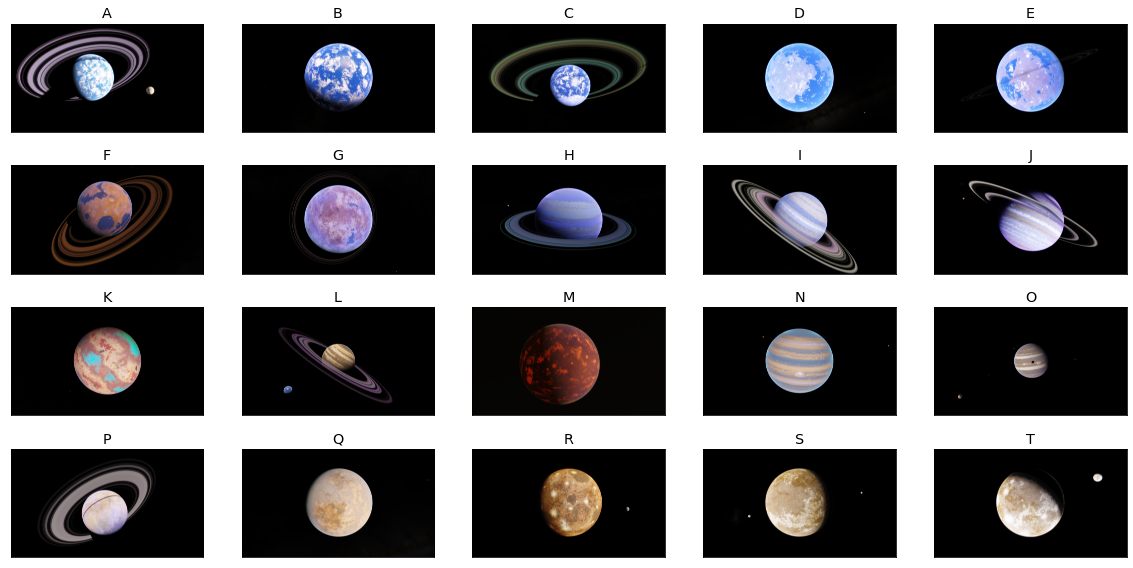

In [32]:
letter_label = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']


fig, ax = plt.subplots(4, 5, figsize=(20,10))

for j,i in enumerate(np.argsort(mean_dist)):
    a = PIL.Image.open("planets/%s" % plist[i])
    a = np.array(a)
    a_img = PIL.Image.fromarray(a)
    ax[j//5, j%5].imshow(a_img)
    ax[j//5, j%5].set_title("%s" % (letter_label[j]), size='x-large')
    ax[j//5, j%5].axes.get_yaxis().set_visible(False)
    ax[j//5, j%5].axes.get_xaxis().set_visible(False)

# plt.savefig("planet_legend.svg")
# plt.savefig("planet_legend.png",bbox_inches="tight")




## Figure 4

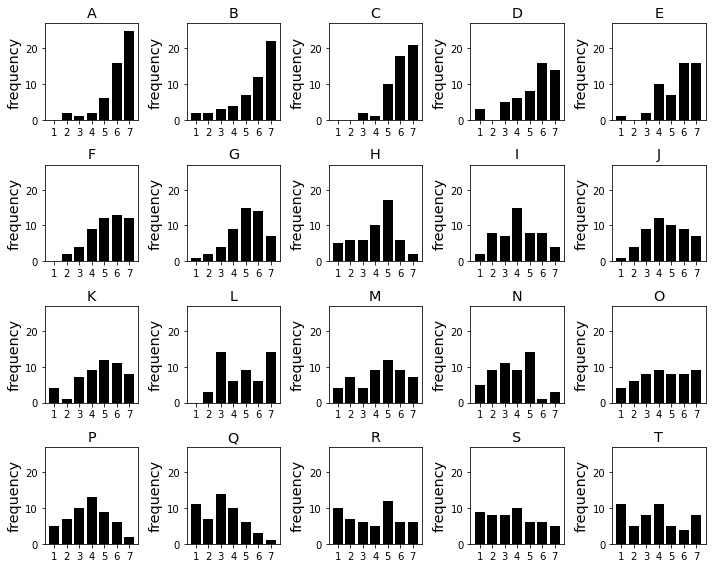

In [33]:
sample_data_likingdfT = sample_data_likingdf.T

fig, ax = plt.subplots(4, 5, figsize= (10,8))

# for j,i in enumerate(plist):
for j,i in enumerate(np.argsort(mean_dist)):
    a= np.array((1,2,3,4,5,6,7))
    b= sample_data_likingdfT['%s' % plist[i]].values
    ax[j // 5, j % 5].bar(a,b,color='k')
    ax[j // 5, j % 5].set_title('%s' % letter_label[j], size = 'x-large')
    ax[j // 5, j % 5].set_ylabel('frequency', size='x-large')
    ax[j // 5, j % 5].set_ylim([0,27])


    ax[j // 5, j % 5].set_xticks(range(1, 8))

    plt.tight_layout()

# plt.savefig("liking_ratings.svg")
# plt.savefig("liking_ratings.png",bbox_inches="tight")

## Figure 5

Text(-0.02, 0.5, 'Probability Density')

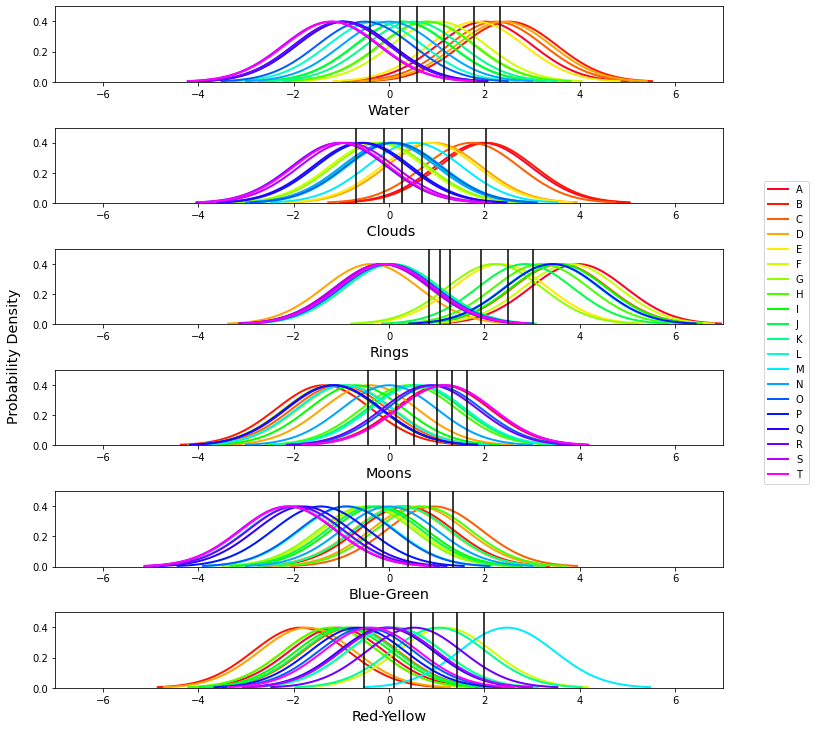

In [34]:
planets_by_dim = np.concatenate((np.repeat(0,dimension), x0_sensory[0:19*dimension])).reshape(20,dimension)
planetsort = np.argsort(planets_by_dim,axis=0)
sensorycriteria = x0[114:150].reshape(6,6)


NUM_COLORS = len(np.argsort(mean_dist))

fig, ax = plt.subplots(6, 1, figsize=(10, 10), sharey=True)


cm = plt.get_cmap('gist_rainbow')

dimensions = ['Water',' Clouds', 'Rings', 'Moons','Blue-Green', 'Red-Yellow']

for dim in range(6):
    plt.tight_layout()
    ax[dim].set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


 

    for j,i in enumerate(np.argsort(mean_dist)):
        

        mu = planets_by_dim[i,dim]
        variance = 1
        sigma =math.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        ax[dim].set_xlim([-7,7])
        ax[dim].set_ylim([0,0.5])

        ax[dim].set_xlabel(dimensions[dim], size='x-large')

        ax[dim].plot(x, stats.norm.pdf(x, mu, sigma), label = '%s' %letter_label[j], linewidth=2)



    for k in range(6):
        ax[dim].axvline(x=sensorycriteria[dim,k], color='k')

lines, labels = fig.axes[-1].get_legend_handles_labels()
    
fig.legend(lines, labels, bbox_to_anchor =(1.1, 0.75), ncol = 1)
fig.text(-0.02, 0.5, 'Probability Density', va='center', rotation='vertical', size='x-large')
  
# plt.savefig("1d_sensory_dist.svg")
# plt.savefig("1d_sensory_dist.png",bbox_inches="tight")

## Table 1

In [35]:

dimension=6
data = x0_pref[0:21]
upper_t = np.zeros((dimension, dimension))
inds = np.triu_indices(len(upper_t))
upper_t[inds] = data


covar_ideal = np.matmul(np.transpose(upper_t), upper_t)
planetResultsCovariance = pd.DataFrame(covar_ideal, columns=['Water','Clouds','Rings','Moons','Blue-green','Red-yellow'],index=['Water','Clouds','Rings','Moons','Blue-green','Red-yellow'])
planetResultsCovariance


,Water,Clouds,Rings,Moons,Blue-green,Red-yellow
Water,33.649203,-20.463041,33.265602,29.460722,30.446332,-10.092308
Clouds,-20.463041,23.087585,-23.323931,-10.772872,1.456558,1.783990
Rings,33.265602,-23.323931,191.144677,245.107748,83.729580,20.996885
Moons,29.460722,-10.772872,245.107748,558.847275,113.256568,66.890012
Blue-green,30.446332,1.456558,83.729580,113.256568,145.613079,20.247039
Red-yellow,-10.092308,1.783990,20.996885,66.890012,20.247039,214.289476


## Figure 6

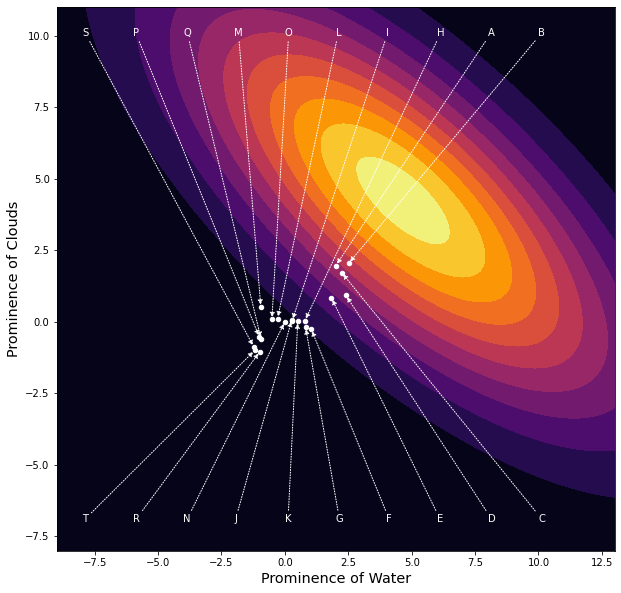

In [36]:

mu_ideal_plot = x0_pref[21:27]

x = np.linspace(-9, 13, 100)
y = np.linspace(-8, 11, 100)

X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))
mu = mu_ideal_plot[0:2]

cov = planetResultsCovariance.values[0:2,0:2]#np.array([[.5, .25],[.25, .5]])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)

y = (planets_by_dim[:,0]) 
z = (planets_by_dim[:,1])
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(X, Y, Z, cmap='inferno', levels=10)

ax.scatter(y, z,zorder=1, color='w', marker='o', s=20)
ax.set_ylabel('Prominence of Clouds', size='x-large')
ax.set_xlabel('Prominence of Water',size='x-large')

tcordy = np.linspace(-4,10,20)
tcordx = np.repeat((-5),20)
n = np.arange(20)
    
for j,i in enumerate(np.argsort(mean_dist)): 

    if i in np.array((5,1,12,13,11,6,7,8,18,3)):
        tcordy[i] = 10
        if i==3:
            tcordx[i] = 10
        if i==5:
            tcordx[i] = 8
        if i==1:
            tcordx[i] =6
        if i==12:
            tcordx[i] = 4
        if i == 13:
            tcordx[i] = 2
        if i == 6:
            tcordx[i] = -2
        if i == 11:
            tcordx[i] = 0
        if i == 7:
            tcordx[i] = -6
        if i == 8:
            tcordx[i] = -4
        if i==18:
            tcordx[i] = -8
    if i in np.array((10,16,0,9,4,15,19,17,14,2)):
        tcordy[i] = -7
        if i==4:
            tcordx[i] = 8
        if i==10:
            tcordx[i] = 6
        if i==16:
            tcordx[i] = 4
        if i == 0:
            tcordx[i] = -4
        if i==15:
            tcordx[i] = 10
        if i==9:
            tcordx[i] = -6
        if i==19:
            tcordx[i] = 0
        if i==17:
            tcordx[i] = 2
        if i==14:
            tcordx[i] = -2
        if i==2:
            tcordx[i] = -8
    
            
        
    
    ax.annotate(letter_label[j], xy=(y[i], z[i]), xycoords='data',
            xytext=(tcordx[i], tcordy[i]), textcoords='data', color='w',
            arrowprops=dict(arrowstyle="-|>", color = 'w', linestyle=':'),
            )
    
# plt.savefig("universe.svg")≠≠≠
# plt.savefig("universe.png",bbox_inches="tight")
